In [1]:
!pip install virtualenv

In [2]:
!virtualenv myenv

created virtual environment CPython3.9.13.final.0-64 in 275ms
  creator CPython3Posix(dest=/Users/zaarr/Desktop/POSTDOC HBKU/CODE/4. Image and Video/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/zaarr/Library/Application Support/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [3]:
!source myenv/bin/activate

In [4]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd

2023-06-18 11:51:03.803603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# MODEL 2

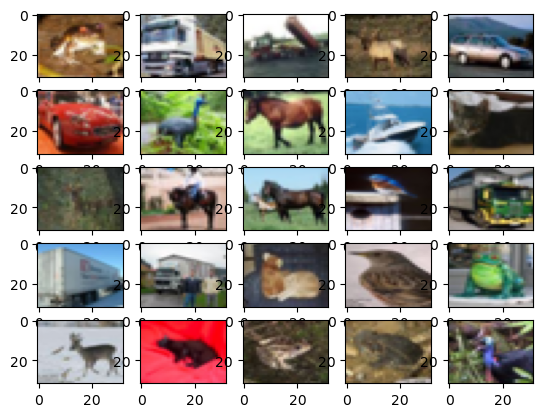

In [ ]:
import matplotlib.pyplot as plt

# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

# MODEL 1

In [7]:
import numpy as np

# Apply the forward Fourier transform to x_train
x_train_fft = np.fft.fft2(x_train)

# Apply the forward Fourier transform to x_test
x_test_fft = np.fft.fft2(x_test)

# Print the shapes of the transformed arrays
print("x_train_fft shape:", x_train_fft.shape)
print("x_test_fft shape:", x_test_fft.shape)

x_train_fft shape: (50000, 32, 32, 3)
x_test_fft shape: (10000, 32, 32, 3)


/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_6163/1538245421.py:5: RuntimeWarning: divide by zero encountered in log
  x_train_fft_magnitude = 20*np.log(np.abs(x_train_fft))
/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_6163/1538245421.py:6: RuntimeWarning: divide by zero encountered in log
  x_test_fft_magnitude = 20*np.log(np.abs(x_test_fft))
/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_6163/1538245421.py:11: RuntimeWarning: invalid value encountered in log
  axes[0, 0].imshow(np.log(1 + x_train_fft_magnitude[0]), cmap='gray')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/6_/d50lgm19265fhn6q8znq45040000gn/T/ipykernel_6163/1538245421.py:15: RuntimeWarning: invalid value encountered in log
  axes[0, 1].imshow(np.log(1 + x_test_fft_magnitude[0]), cmap='gray')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/va

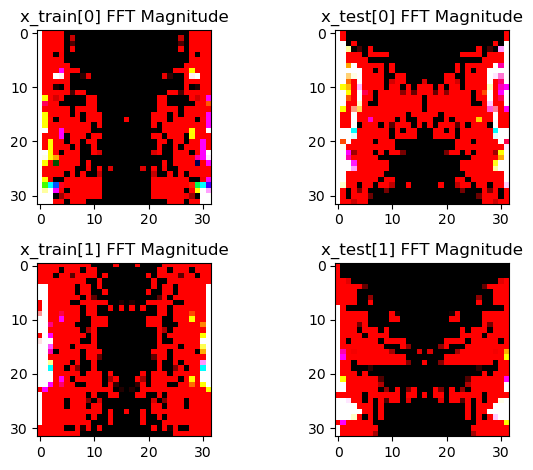

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the magnitude spectra of the transformed images
x_train_fft_magnitude = 20*np.log(np.abs(x_train_fft))
x_test_fft_magnitude = 20*np.log(np.abs(x_test_fft))
# Visualize the magnitude spectra of the transformed images
fig, axes = plt.subplots(2, 2)

# Plot the magnitude spectrum of the first image in x_train
axes[0, 0].imshow(np.log(1 + x_train_fft_magnitude[0]), cmap='gray')
axes[0, 0].set_title("x_train[0] FFT Magnitude")

# Plot the magnitude spectrum of the first image in x_test
axes[0, 1].imshow(np.log(1 + x_test_fft_magnitude[0]), cmap='gray')
axes[0, 1].set_title("x_test[0] FFT Magnitude")

# Plot the magnitude spectrum of the second image in x_train
axes[1, 0].imshow(np.log(1 + x_train_fft_magnitude[1]), cmap='gray')
axes[1, 0].set_title("x_train[1] FFT Magnitude")

# Plot the magnitude spectrum of the second image in x_test
axes[1, 1].imshow(np.log(1 + x_test_fft_magnitude[1]), cmap='gray')
axes[1, 1].set_title("x_test[1] FFT Magnitude")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


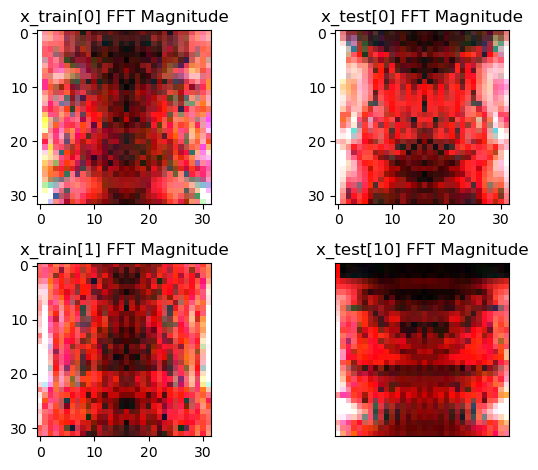

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the magnitude spectra of the transformed images
x_train_fft_magnitude = np.abs(x_train_fft)
x_test_fft_magnitude = np.abs(x_test_fft)

# Define the colormap
cmap = 'inferno'  # You can choose any other colormap from matplotlib

# Visualize the magnitude spectra of the transformed images
fig, axes = plt.subplots(2, 2)

# Plot the magnitude spectrum of the first image in x_train
axes[0, 0].imshow(np.log(1 + x_train_fft_magnitude[0]), cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
axes[0, 0].set_title("x_train[0] FFT Magnitude")

# Plot the magnitude spectrum of the first image in x_test
axes[0, 1].imshow(np.log(1 + x_test_fft_magnitude[0]), cmap=cmap)
axes[0, 1].set_title("x_test[0] FFT Magnitude")

# Plot the magnitude spectrum of the second image in x_train
axes[1, 0].imshow(np.log(1 + x_train_fft_magnitude[1]), cmap=cmap)
axes[1, 0].set_title("x_train[1] FFT Magnitude")

# Plot the magnitude spectrum of the second image in x_test
axes[1, 1].imshow(np.log(1 + x_test_fft_magnitude[1]), cmap=cmap)
axes[1, 1].set_title("x_test[10] FFT Magnitude")

plt.tight_layout()
plt.show()

# MODEL 3

In [10]:
import numpy as np

# Assuming you have the transformed arrays x_train_fft and x_test_fft

# Get the shape of the transformed arrays
train_height, train_width = x_train_fft.shape[1:3]
test_height, test_width = x_test_fft.shape[1:3]

# Crop the transformed arrays into two parts
crop_train_width = train_width // 2
x_train_fft_left = x_train_fft[:, :, :crop_train_width]
x_train_fft_right = x_train_fft[:, :, crop_train_width:]

crop_test_width = test_width // 2
x_test_fft_left = x_test_fft[:, :, :crop_test_width]
x_test_fft_right = x_test_fft[:, :, crop_test_width:]

# Print the shapes of the cropped transformed arrays
print("x_train_fft_left shape:", x_train_fft_left.shape)
print("x_train_fft_right shape:", x_train_fft_right.shape)
print("x_test_fft_left shape:", x_test_fft_left.shape)
print("x_test_fft_right shape:", x_test_fft_right.shape)

x_train_fft_left shape: (50000, 32, 16, 3)
x_train_fft_right shape: (50000, 32, 16, 3)
x_test_fft_left shape: (10000, 32, 16, 3)
x_test_fft_right shape: (10000, 32, 16, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


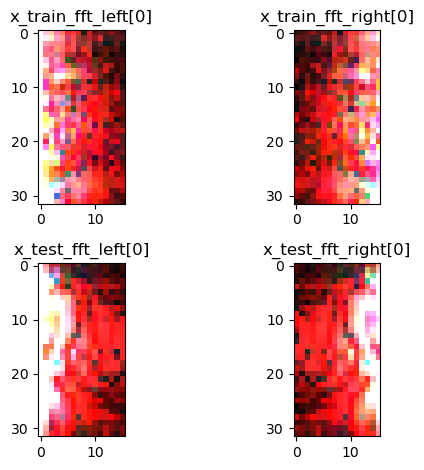

In [11]:
import matplotlib.pyplot as plt

# Assuming you have the cropped transformed arrays x_train_fft_left, x_train_fft_right, x_test_fft_left, and x_test_fft_right

# Plot the cropped transformed arrays
fig, axes = plt.subplots(2, 2)

# Plot the left part of x_train_fft
axes[0, 0].imshow(np.abs(x_train_fft_left[0]), cmap='gray')
axes[0, 0].set_title("x_train_fft_left[0]")

# Plot the right part of x_train_fft
axes[0, 1].imshow(np.abs(x_train_fft_right[0]), cmap='gray')
axes[0, 1].set_title("x_train_fft_right[0]")

# Plot the left part of x_test_fft
axes[1, 0].imshow(np.abs(x_test_fft_left[0]), cmap='gray')
axes[1, 0].set_title("x_test_fft_left[0]")

# Plot the right part of x_test_fft
axes[1, 1].imshow(np.abs(x_test_fft_right[0]), cmap='gray')
axes[1, 1].set_title("x_test_fft_right[0]")

plt.tight_layout()
plt.show()


In [12]:
import numpy as np

# Assuming you have the transformed arrays x_train_fft and x_test_fft

# Get the shape of the transformed arrays
train_height, train_width = x_train_fft.shape[1:3]
test_height, test_width = x_test_fft.shape[1:3]

# Define the crop size
crop_size = 8  # Adjust the crop size as desired

# Calculate the starting and ending indices for cropping
train_start = (train_width - crop_size) // 2
train_end = train_start + crop_size

test_start = (test_width - crop_size) // 2
test_end = test_start + crop_size

# Crop the transformed arrays
x_train_fft_cropped = x_train_fft[:, :, train_start:train_end, :]
x_test_fft_cropped = x_test_fft[:, :, test_start:test_end, :]

# Print the shapes of the cropped transformed arrays
print("x_train_fft_cropped shape:", x_train_fft_cropped.shape)
print("x_test_fft_cropped shape:", x_test_fft_cropped.shape)


x_train_fft_cropped shape: (50000, 32, 8, 3)
x_test_fft_cropped shape: (10000, 32, 8, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


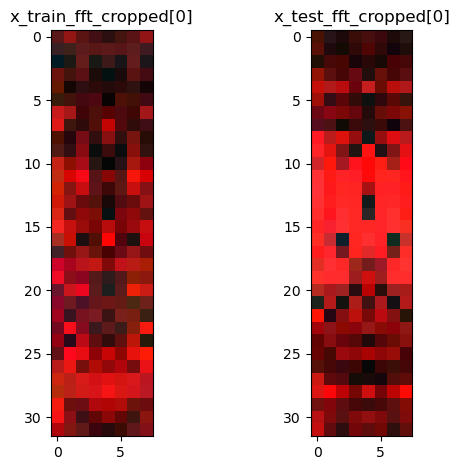

In [13]:
import matplotlib.pyplot as plt

# Assuming you have the cropped transformed arrays x_train_fft_cropped and x_test_fft_cropped

# Plot the cropped transformed arrays
fig, axes = plt.subplots(1, 2)

# Plot the cropped FFT image from x_train_fft_cropped
axes[0].imshow(np.abs(x_train_fft_cropped[0]), cmap='gray')
axes[0].set_title("x_train_fft_cropped[0]")

# Plot the cropped FFT image from x_test_fft_cropped
axes[1].imshow(np.abs(x_test_fft_cropped[0]), cmap='gray')
axes[1].set_title("x_test_fft_cropped[0]")

plt.tight_layout()
plt.show()


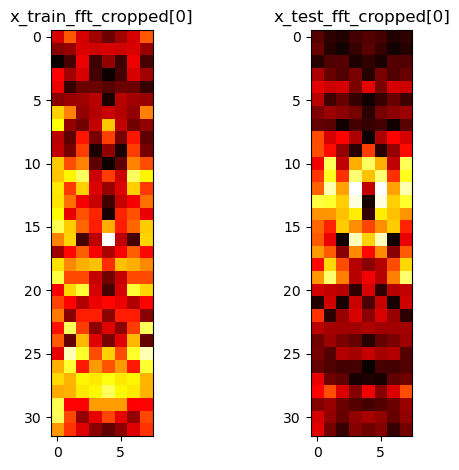

In [14]:
import matplotlib.pyplot as plt

# Assuming you have the cropped transformed arrays x_train_fft_cropped and x_test_fft_cropped

# Plot the cropped transformed arrays
fig, axes = plt.subplots(1, 2)

# Plot the cropped FFT image from x_train_fft_cropped
axes[0].imshow(np.abs(x_train_fft_cropped[0, :, :, 0]), cmap='hot')
axes[0].set_title("x_train_fft_cropped[0]")

# Plot the cropped FFT image from x_test_fft_cropped
axes[1].imshow(np.abs(x_test_fft_cropped[0, :, :, 0]), cmap='hot')
axes[1].set_title("x_test_fft_cropped[0]")

plt.tight_layout()
plt.show()


In [15]:
# Assuming you have the arrays x_train and x_test

# Define the crop region (left, upper, right, lower) based on the previous crop_region
crop_region = (4, 4, 36, 36)

# Capture the cropped region
x_train_cropped = x_train[:, crop_region[1]:crop_region[3], crop_region[0]:crop_region[2], :]
x_test_cropped = x_test[:, crop_region[1]:crop_region[3], crop_region[0]:crop_region[2], :]

# Capture the uncropped region
x_train_uncropped = x_train[:, :crop_region[1], :crop_region[0], :]
x_test_uncropped = x_test[:, :crop_region[1], :crop_region[0], :]

# Print the shapes of the cropped and uncropped arrays
print("x_train_cropped shape:", x_train_cropped.shape)
print("x_test_cropped shape:", x_test_cropped.shape)
print("x_train_uncropped shape:", x_train_uncropped.shape)
print("x_test_uncropped shape:", x_test_uncropped.shape)

x_train_cropped shape: (50000, 28, 28, 3)
x_test_cropped shape: (10000, 28, 28, 3)
x_train_uncropped shape: (50000, 4, 4, 3)
x_test_uncropped shape: (10000, 4, 4, 3)


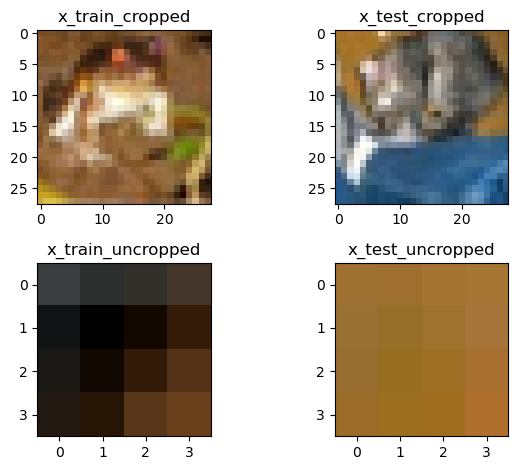

In [16]:
import matplotlib.pyplot as plt

# Assuming you have the arrays x_train_cropped, x_test_cropped, x_train_uncropped, and x_test_uncropped

# Print the cropped regions
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(x_train_cropped[0])
axes[0, 0].set_title("x_train_cropped")

axes[0, 1].imshow(x_test_cropped[0])
axes[0, 1].set_title("x_test_cropped")

# Print the uncropped regions
axes[1, 0].imshow(x_train_uncropped[0])
axes[1, 0].set_title("x_train_uncropped")

axes[1, 1].imshow(x_test_uncropped[0])
axes[1, 1].set_title("x_test_uncropped")

plt.tight_layout()
plt.show()

In [17]:
crop_width = crop_region[2] - crop_region[0]
crop_height = crop_region[3] - crop_region[1]

x_train_fft_cropped = x_train_fft[:, crop_region[1]:crop_region[3], crop_region[0]:crop_region[2], :]
x_test_fft_cropped = x_test_fft[:, crop_region[1]:crop_region[3], crop_region[0]:crop_region[2], :]
x_train_fft_uncropped = x_train_fft[:, :crop_height, :crop_width, :]
x_test_fft_uncropped = x_test_fft[:, :crop_height, :crop_width, :]

# Assuming you have the arrays x_train_fft_cropped, x_test_fft_cropped, x_train_fft_uncropped, and x_test_fft_uncropped

# Print the sizes of the cropped FFT regions
print("Cropped FFT region sizes:")
print("x_train_fft_cropped shape:", x_train_fft_cropped.shape)
print("x_test_fft_cropped shape:", x_test_fft_cropped.shape)

# Print the sizes of the uncropped FFT regions
print("Uncropped FFT region sizes:")
print("x_train_fft_uncropped shape:", x_train_fft_uncropped.shape)
print("x_test_fft_uncropped shape:", x_test_fft_uncropped.shape)


Cropped FFT region sizes:
x_train_fft_cropped shape: (50000, 28, 28, 3)
x_test_fft_cropped shape: (10000, 28, 28, 3)
Uncropped FFT region sizes:
x_train_fft_uncropped shape: (50000, 32, 32, 3)
x_test_fft_uncropped shape: (10000, 32, 32, 3)


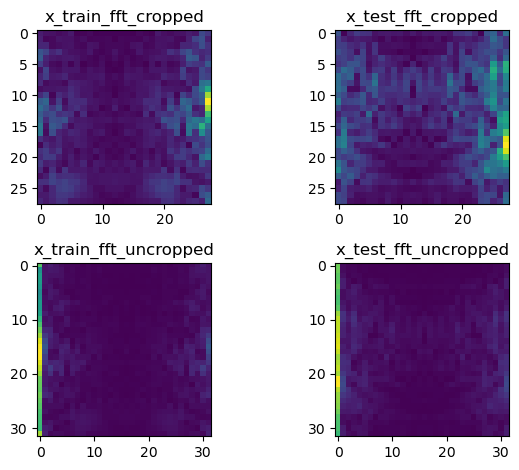

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Assuming you have the arrays x_train_fft_cropped, x_test_fft_cropped, x_train_fft_uncropped, and x_test_fft_uncropped

# Print the cropped regions
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(np.abs(x_train_fft_cropped[0, :, :, 0]))
axes[0, 0].set_title("x_train_fft_cropped")

axes[0, 1].imshow(np.abs(x_test_fft_cropped[0, :, :, 0]))
axes[0, 1].set_title("x_test_fft_cropped")

# Print the uncropped regions
axes[1, 0].imshow(np.abs(x_train_fft_uncropped[0, :, :, 0]))
axes[1, 0].set_title("x_train_fft_uncropped")

axes[1, 1].imshow(np.abs(x_test_fft_uncropped[0, :, :, 0]))
axes[1, 1].set_title("x_test_fft_uncropped")

plt.tight_layout()
plt.show()
plt.savefig("fft_regions.png")

In [45]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

number of classes: 10


In [46]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
# Build the model using the functional API
# input layer
i = Input(shape=x_train_fft[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model1 = Model(i, x)

# model description
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0     

In [47]:
# Compile
model1.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model1.fit(
x_train_fft, y_train, validation_data=(x_test_fft, y_test), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 92s 58ms/step - loss: 1.3892 - accuracy: 0.5230 - val_loss: 1.0488 - val_accuracy: 0.6270
Epoch 2/2
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0461 - accuracy: 0.6330 - val_loss: 0.9637 - val_accuracy: 0.6632


In [50]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)

# model description
model2.summary()

# Compile
model2.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model2.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0   

In [52]:
i = Input(shape=x_train_fft_left[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model3 = Model(i, x)

# model description
model3.summary()

# Compile
model3.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model3.fit(
[x_train_fft_left], y_train, validation_data=([x_test_fft_left], y_test), epochs=2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 16, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 16, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 16, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 16, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 8, 32)        0   

In [55]:
i = Input(shape=x_train_fft_right[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model4 = Model(i, x)

# model description
model4.summary()

# Compile

model4.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model4.fit(
[x_train_fft_right], y_train, validation_data=([x_test_fft_right], y_test), epochs=2)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 16, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 16, 32)        896       
                                                                 
 batch_normalization_36 (Bat  (None, 32, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 16, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 32, 16, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 8, 32)        0   

In [54]:

model3.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model3.fit(
[x_train_fft_right], y_train, validation_data=([x_test_fft_right], y_test), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 53s 33ms/step - loss: 0.9129 - accuracy: 0.6852 - val_loss: 0.9373 - val_accuracy: 0.6861
Epoch 2/2
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8259 - accuracy: 0.7132 - val_loss: 0.8975 - val_accuracy: 0.6953


In [56]:
i = Input(shape=x_train_cropped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model5 = Model(i, x)

# model description
model5.summary()
# Compile
model5.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model5.fit(
x_train_cropped, y_train, validation_data=(x_test_cropped, y_test), epochs=2)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 batch_normalization_42 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_43 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0   

In [60]:
i = Input(shape=x_train_fft_cropped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model7 = Model(i, x)

# model description
model7.summary()

# Compile
model7.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model7.fit(
x_train_fft_cropped, y_train, validation_data=(x_test_fft_cropped, y_test), epochs=2)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 batch_normalization_58 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_59 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_59 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 32)       0   

In [62]:
i = Input(shape=x_train_fft_uncropped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model8 = Model(i, x)

# model description
model8.summary()

# Compile
model8.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])
# Fit
r = model8.fit(
x_train_fft_uncropped, y_train, validation_data=(x_test_fft_uncropped, y_test), epochs=2)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_64 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_65 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 32)       0   

In [ ]:
# Assuming you have the arrays x_train_fft_cropped and x_train_fft_uncropped

# Find the minimum values between each pair of images
min_images = np.minimum(x_train_fft_cropped, x_train_fft_uncropped)

# Print the shape of the min_images array
print("min_images shape:", min_images.shape)

In [ ]:
import numpy as np
from PIL import Image

# Assuming you have the arrays x_train_fft_cropped and x_train_fft_uncropped

# Resize the images to a common shape
resized_cropped = []
for img in x_train_fft_cropped:
    resized_img = Image.fromarray(img).resize((32, 32))
    resized_cropped.append(np.array(resized_img))
resized_cropped = np.array(resized_cropped)

# Find the minimum values between each pair of resized images
min_images = np.minimum(resized_cropped, x_train_fft_uncropped)

# Print the shape of the min_images array
print("min_images shape:", min_images.shape)


In [34]:
# Convert the images to RGB
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)

print("Original shape:", x_train.shape)
print("RGB shape:", x_train_rgb.shape)

# Assuming you have an image array called "image"
num_channels = x_train_rgb.shape[-1]
num_channels2 = x_test_rgb.shape[-1]

print("Number of channels:", num_channels)
print("Number of channels:", num_channels2)

# Convert the images to float32
# Assuming you have RGB images in x_train_rgb and x_test_rgb
x_train_float32 = x_train_rgb.astype('float32')
x_test_float32 = x_test_rgb.astype('float32')

print("Original data type:", x_train_rgb.dtype)
print("Float32 data type:", x_train_float32.dtype)


# Normalize the pixel values to the range [0, 1]
# Assuming you have RGB images in x_train_float32 and x_test_float32

# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train_float32 / 255.0
x_test_normalized = x_test_float32 / 255.0

print("Original pixel value range:", x_train_float32.min(), x_train_float32.max())
print("Normalized pixel value range:", x_train_normalized.min(), x_train_normalized.max())


Original shape: (50000, 32, 32, 3)
RGB shape: (50000, 32, 32, 9)
Number of channels: 9
Number of channels: 9
Original data type: float64
Float32 data type: float32
Original pixel value range: 0.0 1.0
Normalized pixel value range: 0.0 0.003921569


In [35]:
# Extract the red channel from each image
# Assuming you have RGB images in x_train_normalized and x_test_normalized

# Extract the red channel from each image
x_train_red = x_train_normalized[..., 0]
x_test_red = x_test_normalized[..., 0]

print("Original shape:", x_train_normalized.shape)
print("Red channel shape:", x_train_red.shape)



# Assuming you have red channel arrays in x_train_red and x_test_red

# Reshape the red channel arrays
x_train_red_reshaped = np.expand_dims(x_train_red, axis=-1)
x_test_red_reshaped = np.expand_dims(x_test_red, axis=-1)

print("Original shape:", x_train_red.shape)
print("Reshaped shape:", x_train_red_reshaped.shape)

Original shape: (50000, 32, 32, 9)
Red channel shape: (50000, 32, 32)
Original shape: (50000, 32, 32)
Reshaped shape: (50000, 32, 32, 1)


In [38]:
# Assuming you have RGB images in x_train_normalized and x_test_normalized

# Extract the green channel from each image
x_train_green = x_train_normalized[..., 1]
x_test_green = x_test_normalized[..., 1]

print("Original shape:", x_train_normalized.shape)
print("Green channel shape:", x_train_green.shape)


# Assuming you have green channel arrays in x_train_green and x_test_green

# Reshape the green channel arrays
x_train_green_reshaped = np.expand_dims(x_train_green, axis=-1)
x_test_green_reshaped = np.expand_dims(x_test_green, axis=-1)

print("Original shape:", x_train_green.shape)
print("Reshaped shape:", x_train_green_reshaped.shape)

Original shape: (50000, 32, 32, 9)
Green channel shape: (50000, 32, 32)
Original shape: (50000, 32, 32)
Reshaped shape: (50000, 32, 32, 1)


In [39]:
# Assuming you have RGB images in x_train_normalized and x_test_normalized

# Extract the blue channel from each image
x_train_blue = x_train_normalized[..., 2]
x_test_blue = x_test_normalized[..., 2]

print("Original shape:", x_train_normalized.shape)
print("Blue channel shape:", x_train_blue.shape)


# Assuming you have blue channel arrays in x_train_blue and x_test_blue

# Reshape the blue channel arrays
x_train_blue_reshaped = np.expand_dims(x_train_blue, axis=-1)
x_test_blue_reshaped = np.expand_dims(x_test_blue, axis=-1)

print("Original shape:", x_train_blue.shape)
print("Reshaped shape:", x_train_blue_reshaped.shape)

Original shape: (50000, 32, 32, 9)
Blue channel shape: (50000, 32, 32)
Original shape: (50000, 32, 32)
Reshaped shape: (50000, 32, 32, 1)


In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

s1=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index1, valid_index1 = next(s1.split(x_train_red_reshaped, y_train))
x_valid1, y_valid1 = x_train_red_reshaped[valid_index1], y_train[valid_index1]
x_train1, y_train1 = x_train_red_reshaped[train_index1], y_train[train_index1]

print(x_train1.shape, x_valid1.shape, x_test_red_reshaped.shape)


s2=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index2, valid_index2 = next(s2.split(x_train_green_reshaped, y_train))
x_valid2, y_valid2 = x_train_green_reshaped[valid_index2], y_train[valid_index2]
x_train2, y_train2 = x_train_green_reshaped[train_index2], y_train[train_index2]

print(x_train2.shape, x_valid2.shape, x_test_green_reshaped.shape)

s3=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index3, valid_index3 = next(s3.split(x_train_blue_reshaped, y_train))
x_valid3, y_valid3 = x_train_blue_reshaped[valid_index3], y_train[valid_index3]
x_train3, y_train3 = x_train_blue_reshaped[train_index3], y_train[train_index3]

print(x_train3.shape, x_valid3.shape, x_test_blue_reshaped.shape)

(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)
(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)
(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


In [41]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
# Build the model using the functional API
# input layer
i = Input(shape=x_train_red_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model4 = Model(i, x)

# model description
model4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0   

In [44]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_green_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model5 = Model(i, x)

# model description
model5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_30 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0   

In [45]:
# Compile
model5.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

# Fit
r = model5.fit(
x_train_green_reshaped, y_train, validation_data=(x_test_green_reshaped, y_test), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4320 - accuracy: 0.5071 - val_loss: 1.8983 - val_accuracy: 0.3921
Epoch 2/2
1563/1563 [==============================] - 90s 57ms/step - loss: 0.9307 - accuracy: 0.6775 - val_loss: 2.5103 - val_accuracy: 0.2920


In [46]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train_blue_reshaped[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model6 = Model(i, x)

# model description
model6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_36 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0   